Построение различных вариантов кластеризаций и интерпретация результатов.

Цель: Используя данный датасет https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption провести кластеризацию. 

Для точного определения числа k использовать сравнение метода k-means, иерархической кластеризации и DBSCAN. Построить диаграмму "ящик с усами" и оценить выбросы по переменным и кластерам.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, cdist
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, normalize

import scipy.spatial


In [2]:
data = pd.read_csv('household_power_consumption.txt', sep = ';')
data


/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0


In [3]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      object
Global_reactive_power    object
Voltage                  object
Global_intensity         object
Sub_metering_1           object
Sub_metering_2           object
Sub_metering_3           float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [4]:
data.isnull().sum()


Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [5]:
data['Sub_metering_3'].unique()


array([17., 16., 18.,  9.,  0.,  5., 19., 10., 20.,  8.,  4.,  2.,  3.,
       11., 13.,  6., 15., nan, 12.,  1., 14.,  7., 23., 25., 26., 28.,
       27., 21., 22., 29., 24., 30., 31.])

In [6]:
data['Sub_metering_3'].value_counts()


0.0     852092
1.0     471868
18.0    353163
17.0    156593
19.0    121326
12.0     16726
16.0     15831
11.0     11282
29.0      6931
13.0      5339
20.0      4670
28.0      4364
10.0      3309
30.0      3119
9.0       2011
6.0       1993
2.0       1970
7.0       1954
3.0       1935
8.0       1922
4.0       1913
5.0       1899
27.0      1337
26.0       771
21.0       726
23.0       714
22.0       700
25.0       689
24.0       664
15.0       653
14.0       538
31.0       278
Name: Sub_metering_3, dtype: int64

In [7]:
data.columns.tolist()


['Date',
 'Time',
 'Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'Sub_metering_1',
 'Sub_metering_2',
 'Sub_metering_3']

In [8]:
features = ['Global_active_power',
            'Global_reactive_power',
            'Voltage',
            'Global_intensity',
            'Sub_metering_1',
            'Sub_metering_2',
            'Sub_metering_3'
           ]


In [9]:
data[data['Global_active_power'] == '?']


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,?,?,?,?,?,?,NaN
6840,21/12/2006,11:24:00,?,?,?,?,?,?,NaN
19724,30/12/2006,10:08:00,?,?,?,?,?,?,NaN
19725,30/12/2006,10:09:00,?,?,?,?,?,?,NaN
41832,14/1/2007,18:36:00,?,?,?,?,?,?,NaN
...,...,...,...,...,...,...,...,...,...
1990185,28/9/2010,19:09:00,?,?,?,?,?,?,NaN
1990186,28/9/2010,19:10:00,?,?,?,?,?,?,NaN
1990187,28/9/2010,19:11:00,?,?,?,?,?,?,NaN
1990188,28/9/2010,19:12:00,?,?,?,?,?,?,NaN


In [10]:
df = data.dropna()


In [11]:
for i in features:
    df[i] = df[i].astype('float32')
    

/Users/oleg/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [12]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 9 columns):
Date                     object
Time                     object
Global_active_power      float32
Global_reactive_power    float32
Voltage                  float32
Global_intensity         float32
Sub_metering_1           float32
Sub_metering_2           float32
Sub_metering_3           float32
dtypes: float32(7), object(2)
memory usage: 101.6+ MB


In [13]:
df.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091631e+00,1.237042e-01,2.433813e+02,4.629239e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057005e+00,1.128308e-01,4.114049e+00,4.440444e+00,6.104221e+00,5.758089e+00,8.458705e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


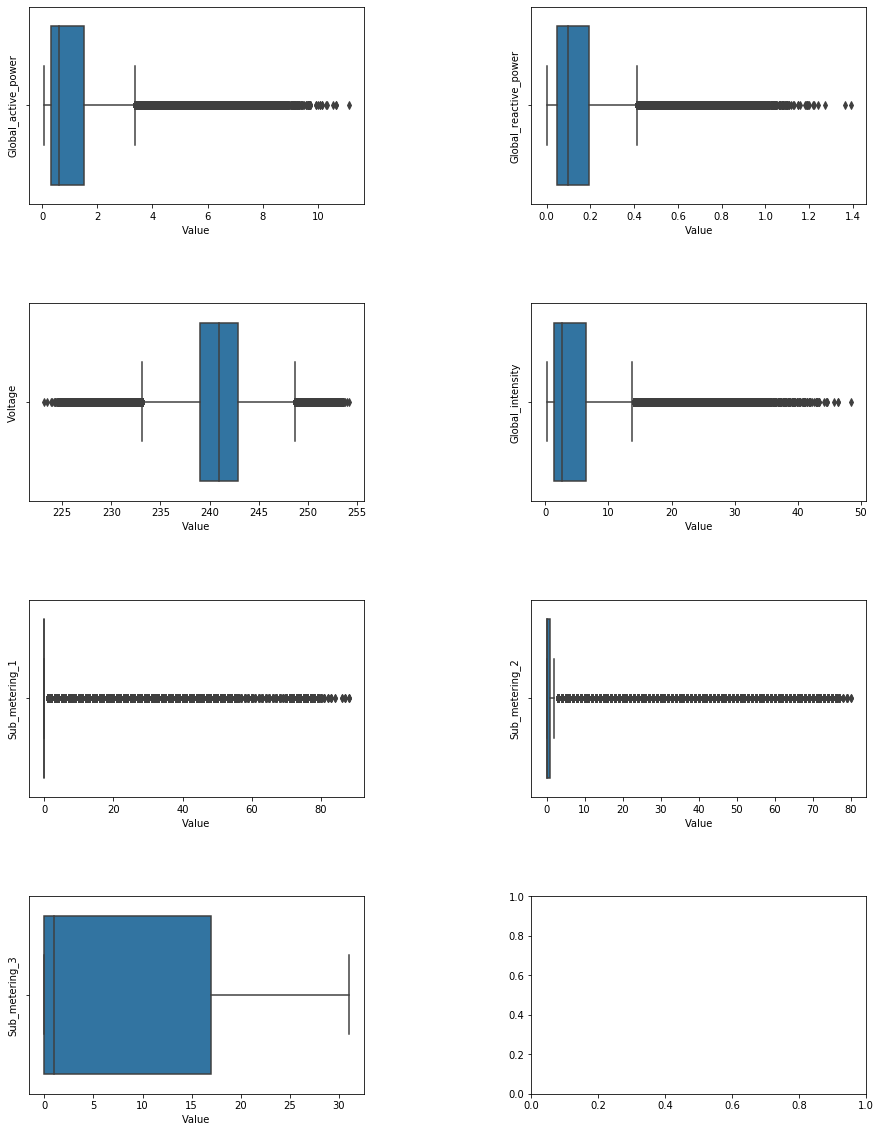

In [14]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 20))

for idx, feat in enumerate(features):
    sns.boxplot(df[feat], ax = axes[idx // 2, idx % 2])
    axes[idx // 2, idx % 2].set_xlabel('Value')
    axes[idx // 2, idx % 2].set_ylabel(feat);
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)


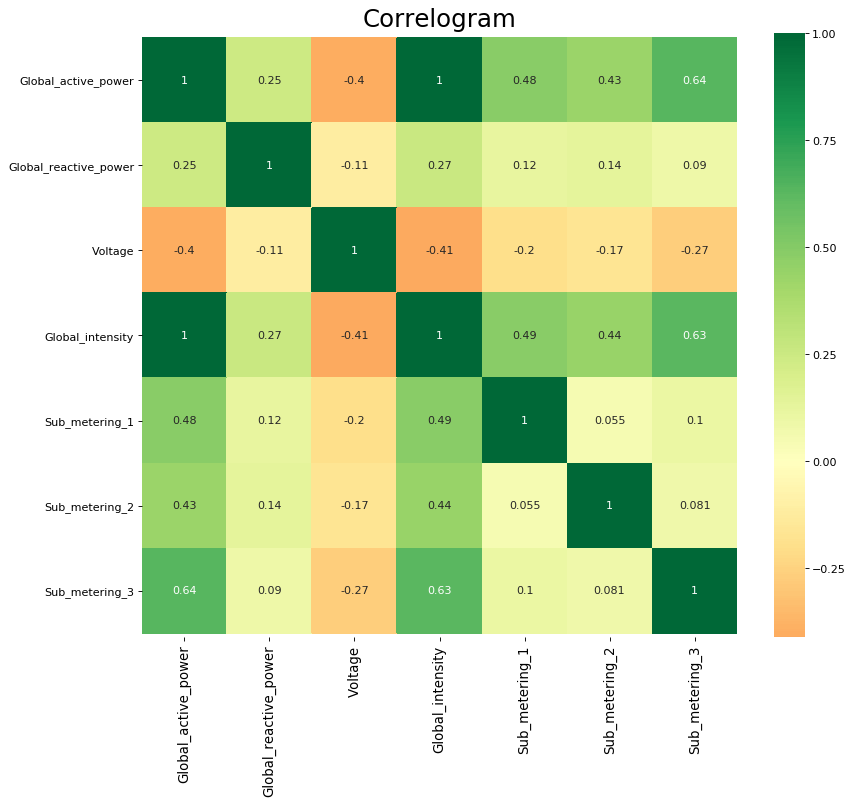

In [15]:
Corr = df.corr()

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(Corr, xticklabels = Corr.columns, yticklabels = Corr.columns, cmap = 'RdYlGn',
            center = 0, annot = True)

plt.title('Correlogram', fontsize = 22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.axis('equal')
plt.show()


In [16]:
CorField = []
CorPairs = []
CorrDel = []

for i in Corr:
    for j in Corr.index[Corr[i] > 0.80]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            CorPairs.append([i, j, Corr[i][Corr.index == j].values[0]])
            CorrDel.append(i)
            print (i, '-->', j, ': R =', Corr[i][Corr.index == j].values[0])


Global_active_power --> Global_intensity : R = 0.9988886002078592


# Обработка данных

Удалим коррелирующие признаки:

In [17]:
CorrDel

['Global_active_power']

In [18]:
features_no_corr = ['Global_reactive_power',
            'Voltage',
            'Global_intensity',
            'Sub_metering_1',
            'Sub_metering_2',
            'Sub_metering_3'
           ]


Для ускорения обучения сократим данные до 20000 объектов

In [19]:
df_1 = df[features_no_corr].sample(n = 20000)
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(df_1)
normalized = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized, columns = features_no_corr)
normalized_df


,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0.183394,-0.470326,0.824707,-0.056748,-0.068410,-0.238994
1,-0.544066,-0.388854,-0.308895,-0.150511,-0.181441,-0.633872
2,0.434771,-0.378181,0.195309,-0.108899,-0.030709,0.785497
3,-0.190631,-0.156740,-0.743526,-0.166862,-0.047054,-0.596828
4,-0.567315,0.136470,0.454412,-0.180711,-0.050959,-0.646363
...,...,...,...,...,...,...
19995,-0.676058,0.128894,-0.510851,-0.114645,-0.138205,-0.482824
19996,-0.442449,-0.209677,-0.577753,-0.145339,-0.175207,-0.612091
19997,0.317952,-0.552637,0.509132,-0.128674,-0.155117,-0.541908
19998,-0.416235,0.392293,-0.543522,-0.136728,-0.164826,-0.575826


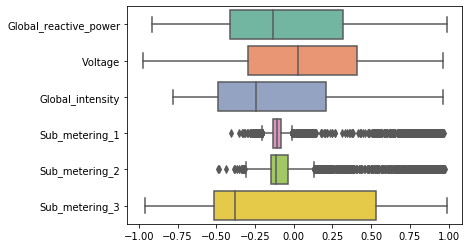

In [20]:
sns.boxplot(data = normalized_df, orient = "h", palette = "Set2");


In [21]:
# Видим большие выбросы у признаков "Sub_metering_1" и "Sub_metering_2"


# ML

# 1. Без работы с выбросами

## Hierarchy

In [22]:
%%time
distance_mat = pdist(normalized_df) 
Z = hierarchy.linkage(distance_mat, 'ward')


CPU times: user 16.9 s, sys: 1.09 s, total: 18 s
Wall time: 18 s


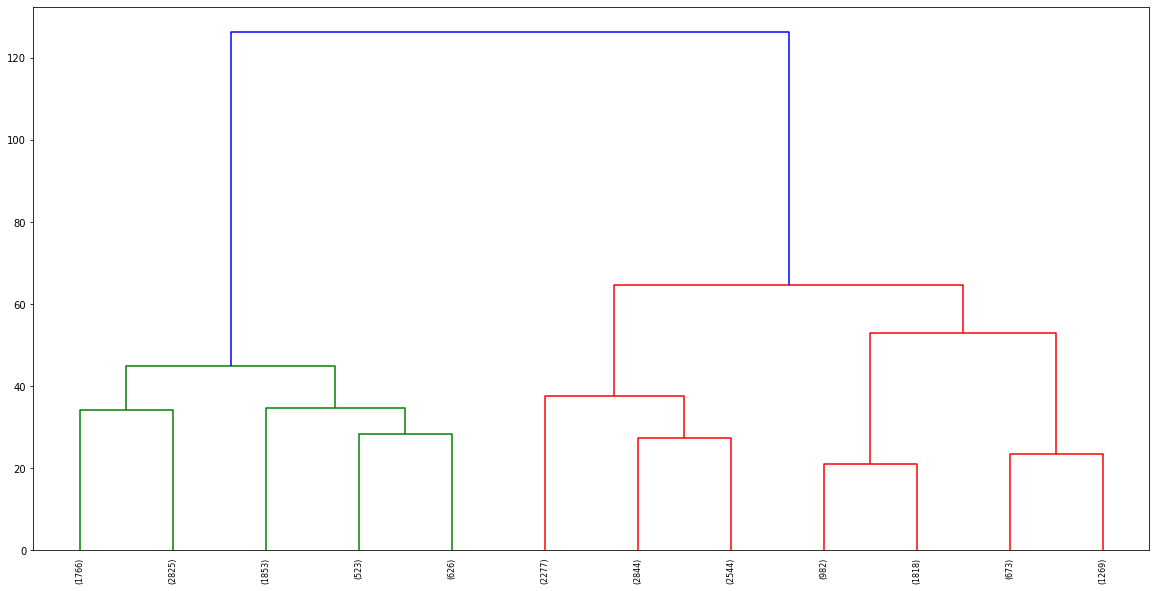

In [23]:
plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(Z, truncate_mode = 'lastp', p = 12, 
                          leaf_font_size = 8., leaf_rotation = 90.)


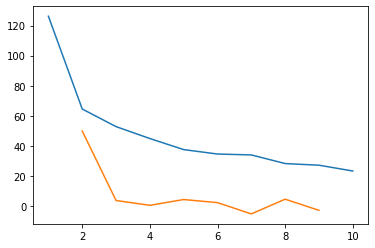

clusters: 2


In [24]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)

last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)


## K-Means

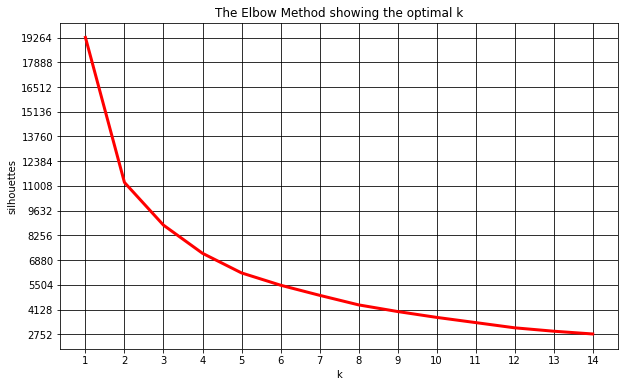

In [25]:
inertia = []
k = range(1, 15)
for k_i in k:
    km = KMeans(n_clusters = k_i).fit(normalized_df)
    inertia.append(km.inertia_)
    
m = int(max(inertia) / len(k))

fig, ax = plt.subplots()
ax.plot(k, inertia, color = 'r', linewidth = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(m))
ax.grid(which='major', color = 'k')
fig.set_figwidth(10)
fig.set_figheight(6)
plt.xlabel('k')
plt.ylabel('silhouettes')
plt.title('The Elbow Method showing the optimal k');
plt.show();


In [61]:
# Перегиб где-то в районе k = 2,3,4, Наверно бОльший перелом виден в k = 2


In [27]:
%%time
silhouettes = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters = k_i)
    km.fit(normalized_df)
    silhouettes.append(silhouette_score(normalized_df, km.labels_))

print(silhouettes)


[0.40523222, 0.36382186, 0.3533663, 0.32725614, 0.34089103, 0.3380823, 0.31287876, 0.3297325]
CPU times: user 2min 23s, sys: 10.4 s, total: 2min 33s
Wall time: 51.1 s


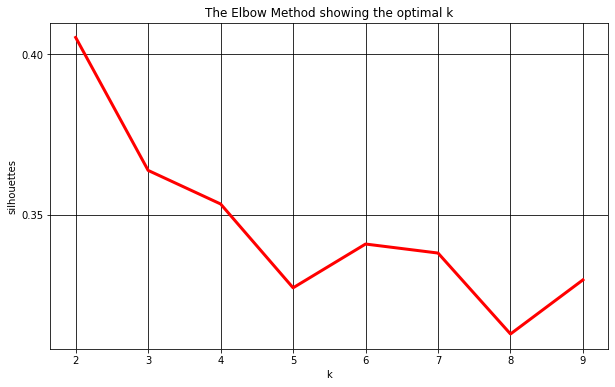

In [28]:
fig, ax = plt.subplots()
ax.plot(k, silhouettes, color = 'r', linewidth = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.grid(which='major', color = 'k')

fig.set_figwidth(10)
fig.set_figheight(6)
plt.xlabel('k')
plt.ylabel('silhouettes')
plt.title('The Elbow Method showing the optimal k');
plt.show();


In [29]:
# Максимальное значение silhouettes при k = 2


## DBSCAN

### Поиск оптимального e


Примим значение min_samples равное количеству признаков плюс 1

In [30]:
def get_plot_e(data):
    min_samples = len(data.columns) + 1
    df = data.to_numpy()
    Y = cdist(df, df, 'euclidean')
    mean_dists = sum(np.transpose(np.sort(Y)[:, :(min_samples + 1)], axes = None)) / min_samples
    x = np.sort(mean_dists)
    y = [i for i in range(0, len(x))]
    fig, ax = plt.subplots()
    ax.plot(y, x, color = 'r', linewidth = 3)
    ax.grid(which='major', color = 'k')
    fig.set_figwidth(10)
    fig.set_figheight(6)
    plt.xlabel('range')
    plt.ylabel('mean_distance ')
    plt.title('Ortimal e');
    plt.show();


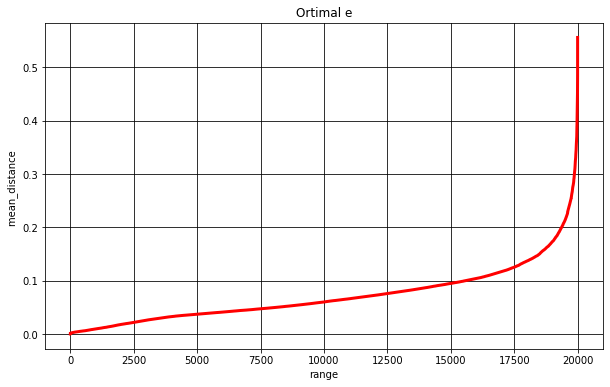

CPU times: user 29.2 s, sys: 2.23 s, total: 31.4 s
Wall time: 31.5 s


In [31]:
%%time
get_plot_e(normalized_df)


In [32]:
# Перелом графика наблюдается на уровне от 0.12 до 0.25, возьмем 0.2
eps = 0.2
data_d = normalized_df
min_samples = len(data_d.columns) + 1

db = DBSCAN(eps = eps, min_samples = min_samples, n_jobs = -1).fit(data_d)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('eps = {:.3f}: Cluster = {}, Noize = {:.2f}%'.format(eps, (n_clusters_), 
                                                           (100 * n_noise_ / data_d.shape[0])))


eps = 0.200: Cluster = 6, Noize = 2.49%


In [33]:
def frange(start, stop, step):
    i = start
    while i < stop:
        yield i
        i += step


In [34]:
min_samples = len(normalized_df.columns) + 1

for j in frange(0.10, 0.3, 0.01):

    db = DBSCAN(eps = j, min_samples = min_samples, n_jobs = -1).fit(normalized_df)
    core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('eps = {:.2f}: Cluster = {}, Noize = {:.2f}%'.format(j, (n_clusters_), 
                                                               (100 * n_noise_ / normalized_df.shape[0])))


eps = 0.10: Cluster = 47, Noize = 21.68%
eps = 0.11: Cluster = 30, Noize = 16.64%
eps = 0.12: Cluster = 29, Noize = 13.02%
eps = 0.13: Cluster = 25, Noize = 10.41%
eps = 0.14: Cluster = 23, Noize = 8.40%
eps = 0.15: Cluster = 18, Noize = 6.64%
eps = 0.16: Cluster = 18, Noize = 5.28%
eps = 0.17: Cluster = 11, Noize = 4.39%
eps = 0.18: Cluster = 10, Noize = 3.58%
eps = 0.19: Cluster = 7, Noize = 2.97%
eps = 0.20: Cluster = 6, Noize = 2.49%
eps = 0.21: Cluster = 5, Noize = 2.08%
eps = 0.22: Cluster = 5, Noize = 1.78%
eps = 0.23: Cluster = 6, Noize = 1.50%
eps = 0.24: Cluster = 4, Noize = 1.20%
eps = 0.25: Cluster = 4, Noize = 0.98%
eps = 0.26: Cluster = 4, Noize = 0.83%
eps = 0.27: Cluster = 3, Noize = 0.72%
eps = 0.28: Cluster = 3, Noize = 0.64%
eps = 0.29: Cluster = 3, Noize = 0.52%


Если применить метод локтя к количеству кластеров, т.е. при каких значениях замедляется падение кластеров, то оптимально смотрится k = 7

### Итого:
1. hierarchy: k = 2
2. Метод локтя: k = 2, 3, 4
3. Силуэт: k = 2
4. DBSCAN: k = 7

На основе всех подходов выберим k = 2


In [36]:
kmeans = KMeans(n_clusters = 2)
cluster_label = kmeans.fit_predict(normalized_df)
cluster_label


array([1, 0, 1, ..., 0, 0, 1], dtype=int32)

In [37]:
res = pd.Series(cluster_label, name = 'Cluster')
result = pd.concat([normalized_df, res], axis = 1, sort = False)
result


,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Cluster
0,0.183394,-0.470326,0.824707,-0.056748,-0.068410,-0.238994,1
1,-0.544066,-0.388854,-0.308895,-0.150511,-0.181441,-0.633872,0
2,0.434771,-0.378181,0.195309,-0.108899,-0.030709,0.785497,1
3,-0.190631,-0.156740,-0.743526,-0.166862,-0.047054,-0.596828,0
4,-0.567315,0.136470,0.454412,-0.180711,-0.050959,-0.646363,0
...,...,...,...,...,...,...,...
19995,-0.676058,0.128894,-0.510851,-0.114645,-0.138205,-0.482824,0
19996,-0.442449,-0.209677,-0.577753,-0.145339,-0.175207,-0.612091,0
19997,0.317952,-0.552637,0.509132,-0.128674,-0.155117,-0.541908,0
19998,-0.416235,0.392293,-0.543522,-0.136728,-0.164826,-0.575826,0


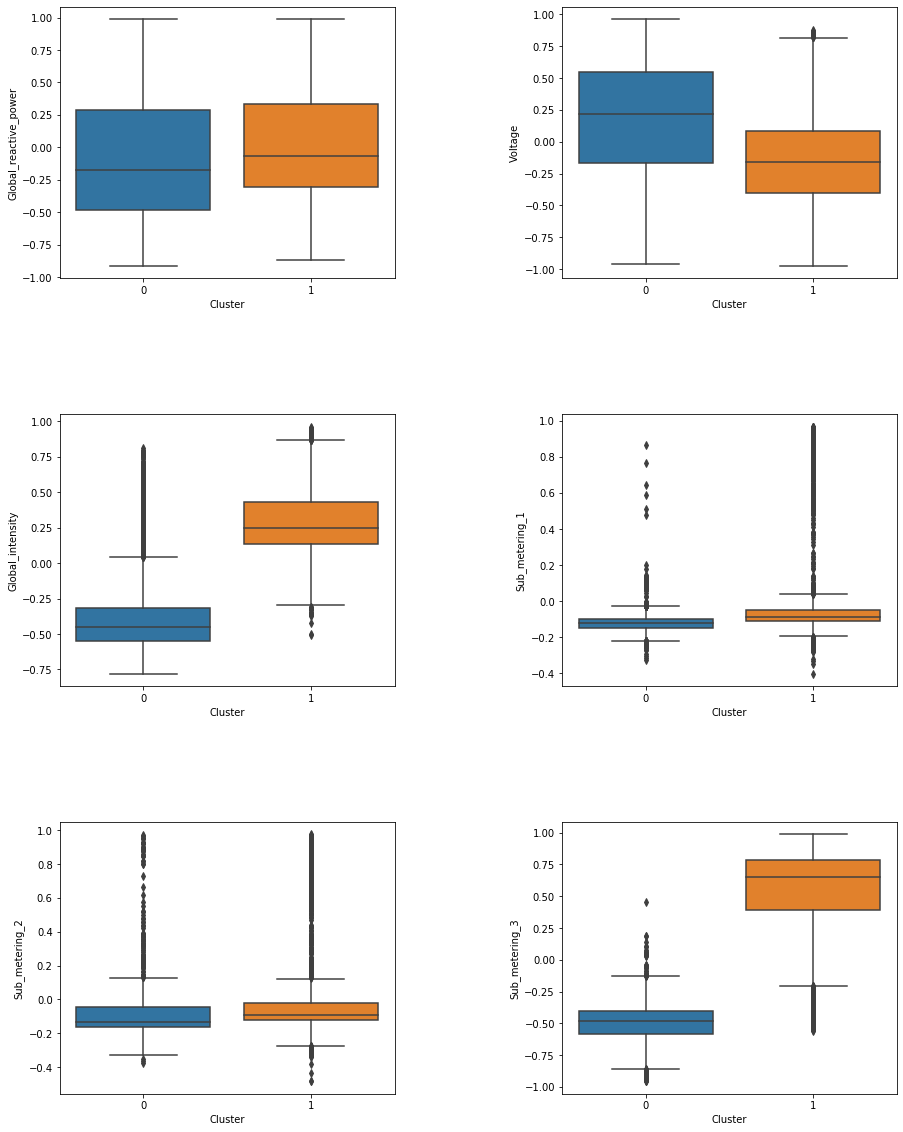

In [38]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 20))
res_col = result.columns.tolist()
res_col.remove('Cluster')

for idx, feat in enumerate(res_col):
    sns.boxplot(x = 'Cluster', y = feat, data = result, ax = axes[idx // 2, idx % 2])
    axes[idx // 2, idx % 2].set_xlabel('Cluster')
    axes[idx // 2, idx % 2].set_ylabel(feat);
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    

In [39]:
# Наблюдаются выбросы не только у признаков, которые были с большими выбросами


# 2. С обработкой выбросов


In [40]:
def outlier_detect_IQR(data, col, threshold = 3):    
    IQR = data[col].quantile(0.65) - data[col].quantile(0.35)
    Lower_fence = data[col].quantile(0.35) - (IQR * threshold)
    Upper_fence = data[col].quantile(0.65) + (IQR * threshold)
    borders = (Lower_fence, Upper_fence)
    return borders

def windsorization(data, cols):
    data_copy = data.copy(deep=True)  
    for col in cols:
        borders = outlier_detect_IQR(data, col, threshold = 3)
        data_copy.loc[data_copy[col]>borders[1], col] = borders[1]
        data_copy.loc[data_copy[col]<borders[0], col] = borders[0]
    return data_copy


In [41]:
data_no_excess = windsorization(
    normalized_df, cols=["Sub_metering_1", "Sub_metering_2"])


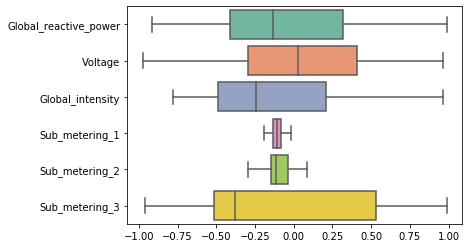

In [42]:
sns.boxplot(data = data_no_excess, orient = "h", palette = "Set2");


## Hierarchy

In [43]:
%%time
distance_mat = pdist(data_no_excess) 
Z = hierarchy.linkage(distance_mat, 'ward')


CPU times: user 15.5 s, sys: 1.1 s, total: 16.6 s
Wall time: 16.6 s


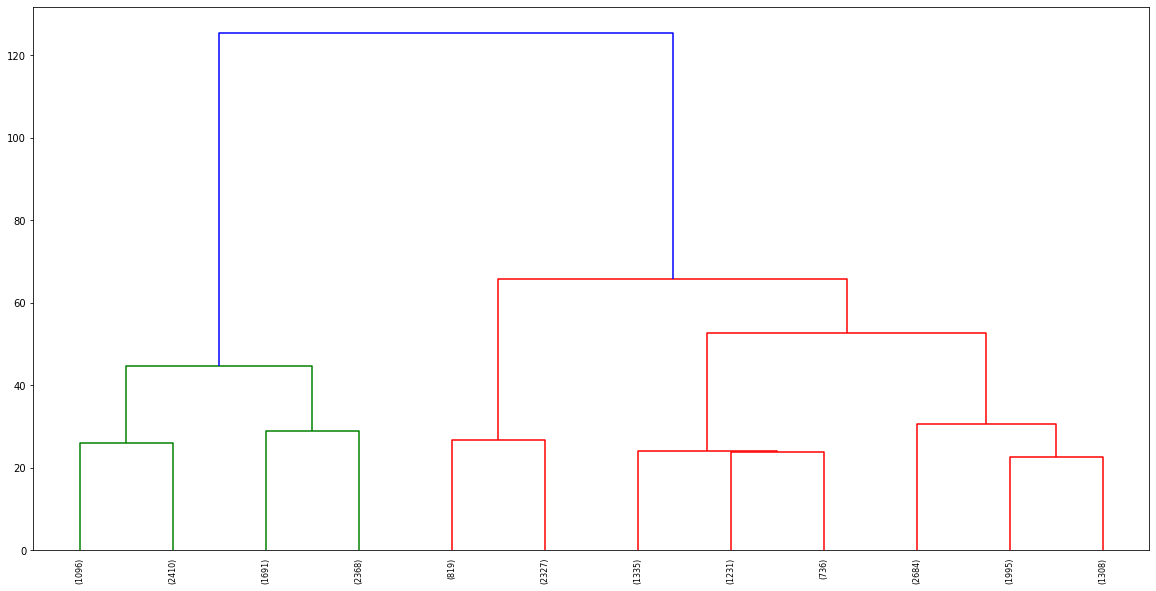

In [44]:
plt.figure(figsize=(20, 10))
dn = hierarchy.dendrogram(Z, truncate_mode = 'lastp', p = 12, 
                          leaf_font_size = 8., leaf_rotation = 90.)


In [45]:
from scipy.cluster.hierarchy import inconsistent

depth = 5
incons = inconsistent(Z, depth)


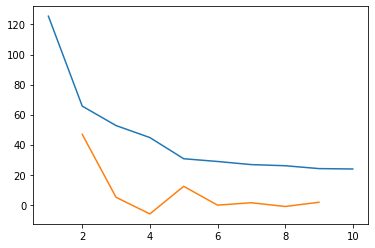

clusters: 2


In [46]:
last = Z[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  # 2nd derivative of the distances
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2  # if idx 0 is the max of this we want 2 clusters
print("clusters:", k)


In [47]:
# Иерархическая кластеризация все равно "рекомендует" 2 кластера


## DBSCAN

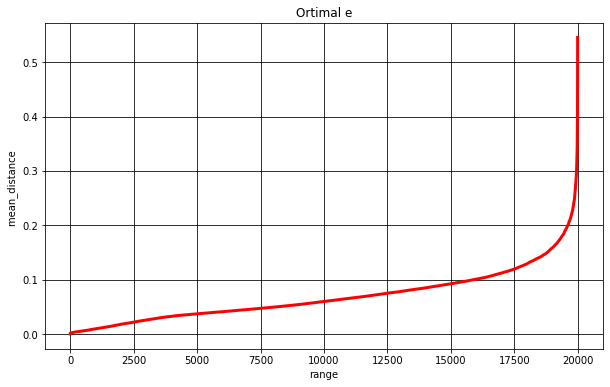

CPU times: user 28.8 s, sys: 2.18 s, total: 31 s
Wall time: 31.1 s


In [48]:
%%time
get_plot_e(data_no_excess)


In [49]:
# Область перелома на графике не сильно изменилась

eps = 0.2
data_d = data_no_excess
min_samples = len(data_d.columns) + 1

db = DBSCAN(eps = eps, min_samples = min_samples, n_jobs = -1).fit(data_d)
core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('eps = {:.3f}: Cluster = {}, Noize = {:.2f}%'.format(eps, (n_clusters_), 
                                                           (100 * n_noise_ / data_d.shape[0])))


eps = 0.200: Cluster = 1, Noize = 1.54%


In [50]:
# Теперь BDSCAN показывает 1 кластер

In [51]:
data_d = data_no_excess
min_samples = len(data_d.columns) + 1

for j in frange(0.10, 0.3, 0.01):

    db = DBSCAN(eps = j, min_samples = min_samples, n_jobs = -1).fit(data_d)
    core_samples_mask = np.zeros_like(db.labels_, dtype = bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)

    print('eps = {:.2f}: Cluster = {}, Noize = {:.2f}%'.format(j, (n_clusters_), 
                                                               (100 * n_noise_ / data_d.shape[0])))


eps = 0.10: Cluster = 44, Noize = 20.41%
eps = 0.11: Cluster = 30, Noize = 15.16%
eps = 0.12: Cluster = 24, Noize = 11.59%
eps = 0.13: Cluster = 19, Noize = 9.01%
eps = 0.14: Cluster = 17, Noize = 7.01%
eps = 0.15: Cluster = 15, Noize = 5.30%
eps = 0.16: Cluster = 14, Noize = 4.04%
eps = 0.17: Cluster = 7, Noize = 3.18%
eps = 0.18: Cluster = 7, Noize = 2.42%
eps = 0.19: Cluster = 3, Noize = 1.94%
eps = 0.20: Cluster = 1, Noize = 1.54%
eps = 0.21: Cluster = 1, Noize = 1.24%
eps = 0.22: Cluster = 2, Noize = 0.97%
eps = 0.23: Cluster = 1, Noize = 0.73%
eps = 0.24: Cluster = 1, Noize = 0.59%
eps = 0.25: Cluster = 1, Noize = 0.47%
eps = 0.26: Cluster = 1, Noize = 0.34%
eps = 0.27: Cluster = 1, Noize = 0.29%
eps = 0.28: Cluster = 1, Noize = 0.28%
eps = 0.29: Cluster = 1, Noize = 0.21%


Перелом числа кластеров DBSCAN приходится на k = 7


## K-Means

In [52]:
%%time
silhouettes = []
k = range(2, 10)
for k_i in k:
    km = KMeans(n_clusters = k_i)
    km.fit(data_no_excess)
    silhouettes.append(silhouette_score(data_no_excess, km.labels_))

print(silhouettes)


[0.41328275, 0.37765938, 0.3698216, 0.3318482, 0.33553725, 0.3021535, 0.31821182, 0.32411295]
CPU times: user 2min 31s, sys: 11.1 s, total: 2min 42s
Wall time: 54.9 s


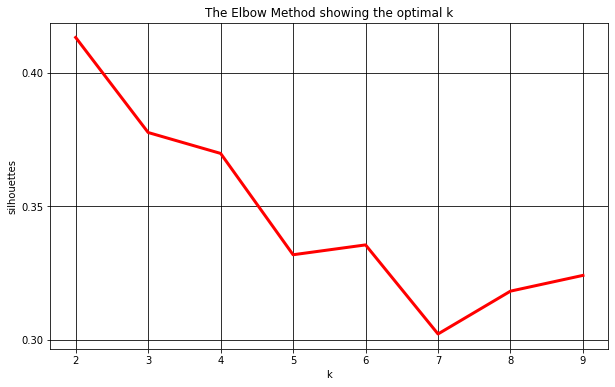

In [53]:
fig, ax = plt.subplots()
ax.plot(k, silhouettes, color = 'r', linewidth = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.05))
ax.grid(which='major', color = 'k')

fig.set_figwidth(10)
fig.set_figheight(6)
plt.xlabel('k')
plt.ylabel('silhouettes')
plt.title('The Elbow Method showing the optimal k');
plt.show();


In [54]:
# Максимальный silhouettes все равно на k = 2


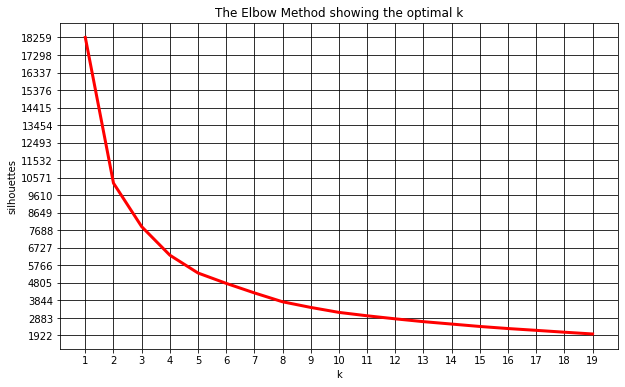

In [55]:
inertia = []
k = range(1, 20)
for k_i in k:
    km = KMeans(n_clusters = k_i).fit(data_no_excess)
    inertia.append(km.inertia_)
    
m = int(max(inertia) / len(k))
fig, ax = plt.subplots()
ax.plot(k, inertia, color = 'r', linewidth = 3)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(m))
ax.grid(which='major', color = 'k')
fig.set_figwidth(10)
fig.set_figheight(6)
plt.xlabel('k')
plt.ylabel('silhouettes')
plt.title('The Elbow Method showing the optimal k');
plt.show();


In [56]:
# Перелом по методу Локтя остался так же на уровне k = 2-5, я бы отдал предпочтение тут k = 2


Итого:
1. DBCSAN: k = 7
2. Силуэт: k = 2
3. inertia: k = 2-5
4. hierarchy: k = 2

Выбор опять на k = 2

In [57]:
kmeans = KMeans(n_clusters = 2)
cluster_label = kmeans.fit_predict(data_no_excess)
cluster_label


array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

In [58]:
res = pd.Series(cluster_label, name = 'Cluster')
result = pd.concat([data_no_excess, res], axis = 1, sort = False)
result


,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Cluster
0,0.183394,-0.470326,0.824707,-0.056748,-0.068410,-0.238994,0
1,-0.544066,-0.388854,-0.308895,-0.150511,-0.181441,-0.633872,1
2,0.434771,-0.378181,0.195309,-0.108899,-0.030709,0.785497,0
3,-0.190631,-0.156740,-0.743526,-0.166862,-0.047054,-0.596828,1
4,-0.567315,0.136470,0.454412,-0.180711,-0.050959,-0.646363,1
...,...,...,...,...,...,...,...
19995,-0.676058,0.128894,-0.510851,-0.114645,-0.138205,-0.482824,1
19996,-0.442449,-0.209677,-0.577753,-0.145339,-0.175207,-0.612091,1
19997,0.317952,-0.552637,0.509132,-0.128674,-0.155117,-0.541908,1
19998,-0.416235,0.392293,-0.543522,-0.136728,-0.164826,-0.575826,1


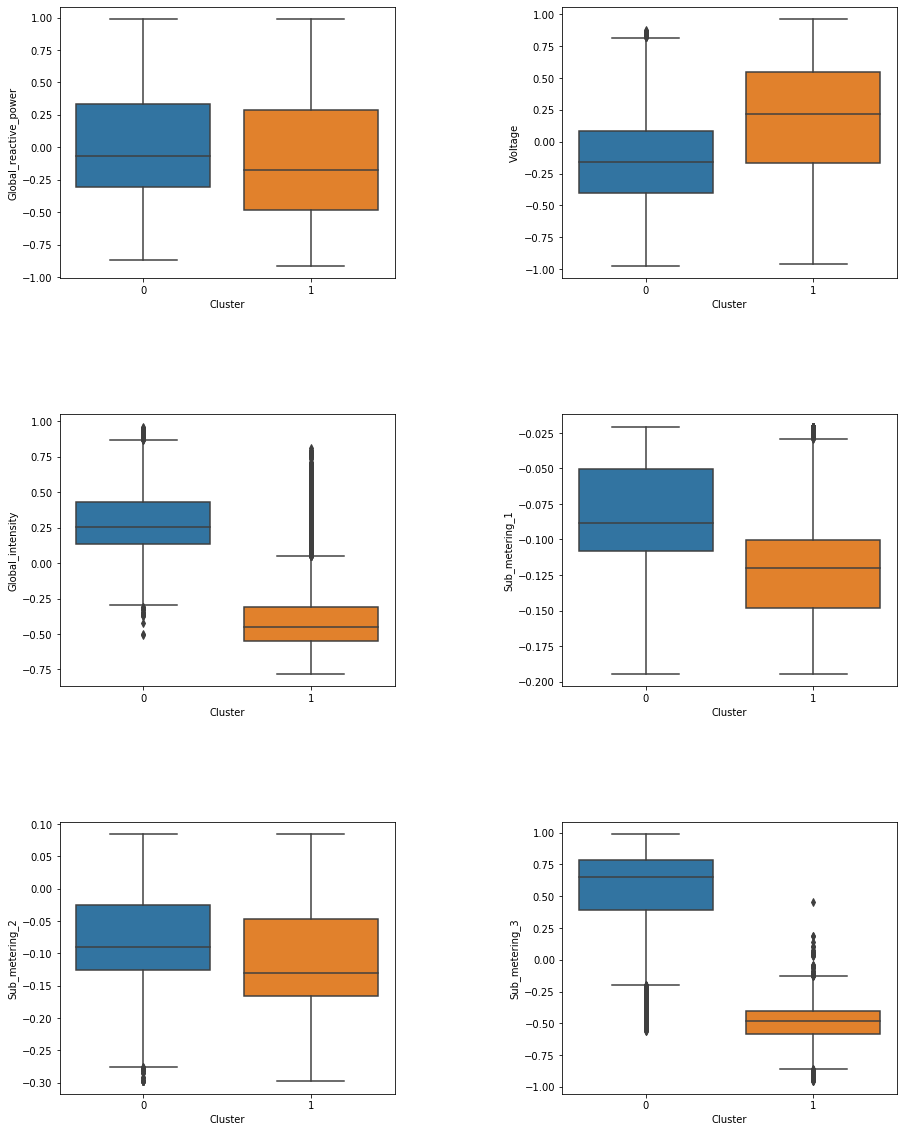

In [59]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 20))
res_col = result.columns.tolist()
res_col.remove('Cluster')

for idx, feat in enumerate(res_col):
    sns.boxplot(x = 'Cluster', y = feat, data = result, ax = axes[idx // 2, idx % 2])
    axes[idx // 2, idx % 2].set_xlabel('Cluster')
    axes[idx // 2, idx % 2].set_ylabel(feat);
    plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
    

In [62]:
# На данных мы видим меньше выбросов, чем до обработки.


# Выводы:

1. В моем случае работа с выбросами не повлияла на результат отбора параметров.
2. Но данные с обработанными выбросами, как мне показалось, лучше сработала для DBSCAN
3. Переменные, которые имели большие выбросы, при срезе 
4. Сложно найти оптимальное значение eps для DBSCAN
